In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.append(project_root)
from code_utils import stats_utils, plot_utils
from code_analysis import analyze_expt1

#### Load human behav data

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()
image_type_names = np.array(['pool1', 'pool2', 'pool3', 'pool4', 'orig'])
cue_level_names = np.array(['basic','super'])
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)


#### Load image discriminability 

In [22]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')

sigmas = [4, 13, 26]
names = ['orig'] + ['lowpass_sigma%d'%ss for ss in sigmas] + \
        ['orig'] + ['highpass_sigma%d'%ss for ss in sigmas] 

fn2load = [os.path.join(save_dir, 'categ_discrim_images_expt1_filt_%s.npy'%name) for name in names]
fn2load[0] = os.path.join(save_dir, 'categ_discrim_images_expt1.npy')
fn2load[4] = os.path.join(save_dir, 'categ_discrim_images_expt1.npy')

d = [np.load(fn, allow_pickle=True).item() for fn in fn2load]
d[0].keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

#### Params for plotting

In [28]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

sigma_colors = np.concatenate([cm.Purples(np.linspace(0,1,6))[1:5,:], \
                               cm.Reds(np.linspace(0,1,6))[1:5,:]], axis=0)
 
groups = [np.arange(0,4), np.arange(4,8)]


#### Plot overall "performance" of SimCLR for each condition

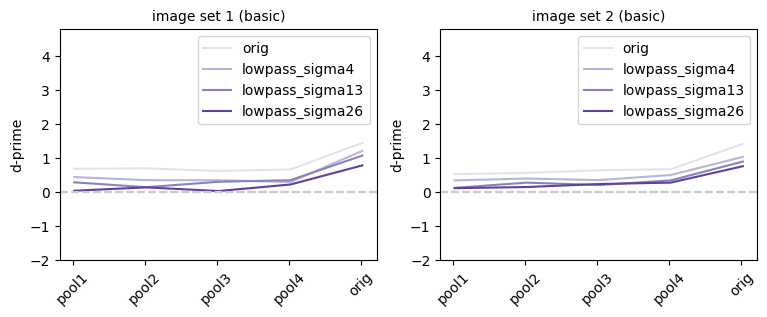

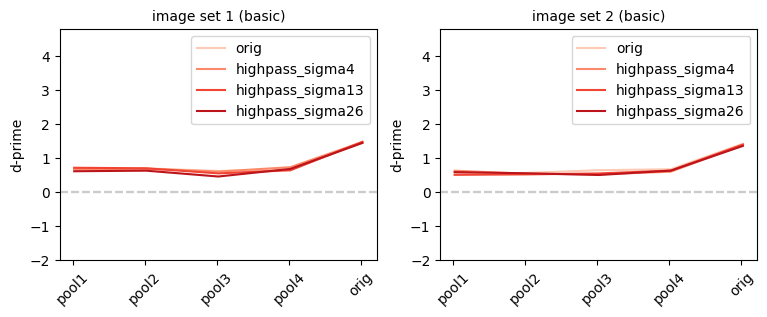

In [32]:
plot_utils.set_all_font_sizes(10)


for gi, group in enumerate(groups):

    plt.figure(figsize=(9,3))

    lh = []
    ln = []
    for nn in group:
        
        name = names[nn]
        ln += [name]
        
        for cbi, cb in enumerate([1,2]):

            ax = plt.subplot(1,2,cb)

            # 

            vals = np.mean(d[nn]['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
            # vals2 = d[nn]['dprime_super_overall'][:,cbi]

            # for cc, vals in enumerate([vals1, vals2]):

            h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                     '-',color=sigma_colors[nn,:])

            if cbi==0:
                lh.append(h[0])

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


            plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

            # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
            ax.legend(lh, ln, loc='upper right')

            plt.ylabel('d-prime')

            plt.ylim([-2, 4.8])

            plt.title('image set %d (basic)'%(cb))

# plt.suptitle('discriminability of categories in SimCLR');

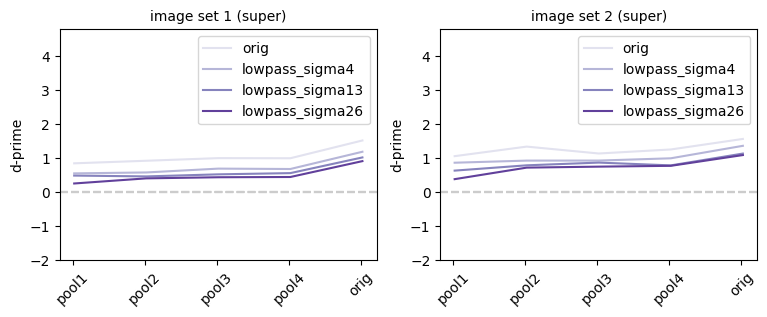

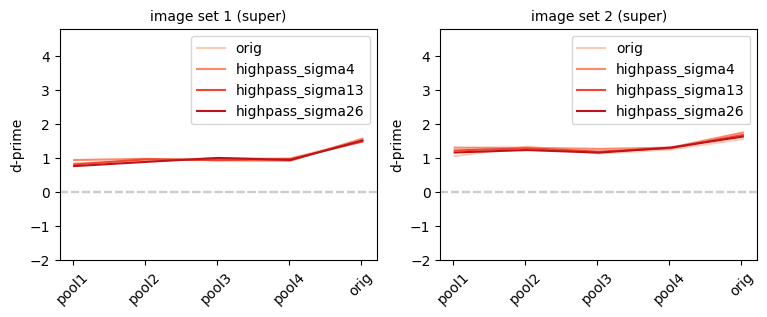

In [34]:
plot_utils.set_all_font_sizes(10)

for gi, group in enumerate(groups):

    plt.figure(figsize=(9,3))

    lh = []
    ln = []
    for nn in group:
        
        name = names[nn]
        ln += [name]
        
        for cbi, cb in enumerate([1,2]):

            ax = plt.subplot(1,2,cb)

            # 

            # vals = np.mean(d[nn]['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
            vals = d[nn]['dprime_super_overall'][:,cbi]

            # for cc, vals in enumerate([vals1, vals2]):

            h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                     '-',color=sigma_colors[nn,:])

            if cbi==0:
                lh.append(h[0])

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


            plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

            # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
            ax.legend(lh, ln, loc='upper right')

            plt.ylabel('d-prime')

            plt.ylim([-2, 4.8])

            plt.title('image set %d (super)'%(cb))

# plt.suptitle('discriminability of categories in SimCLR');

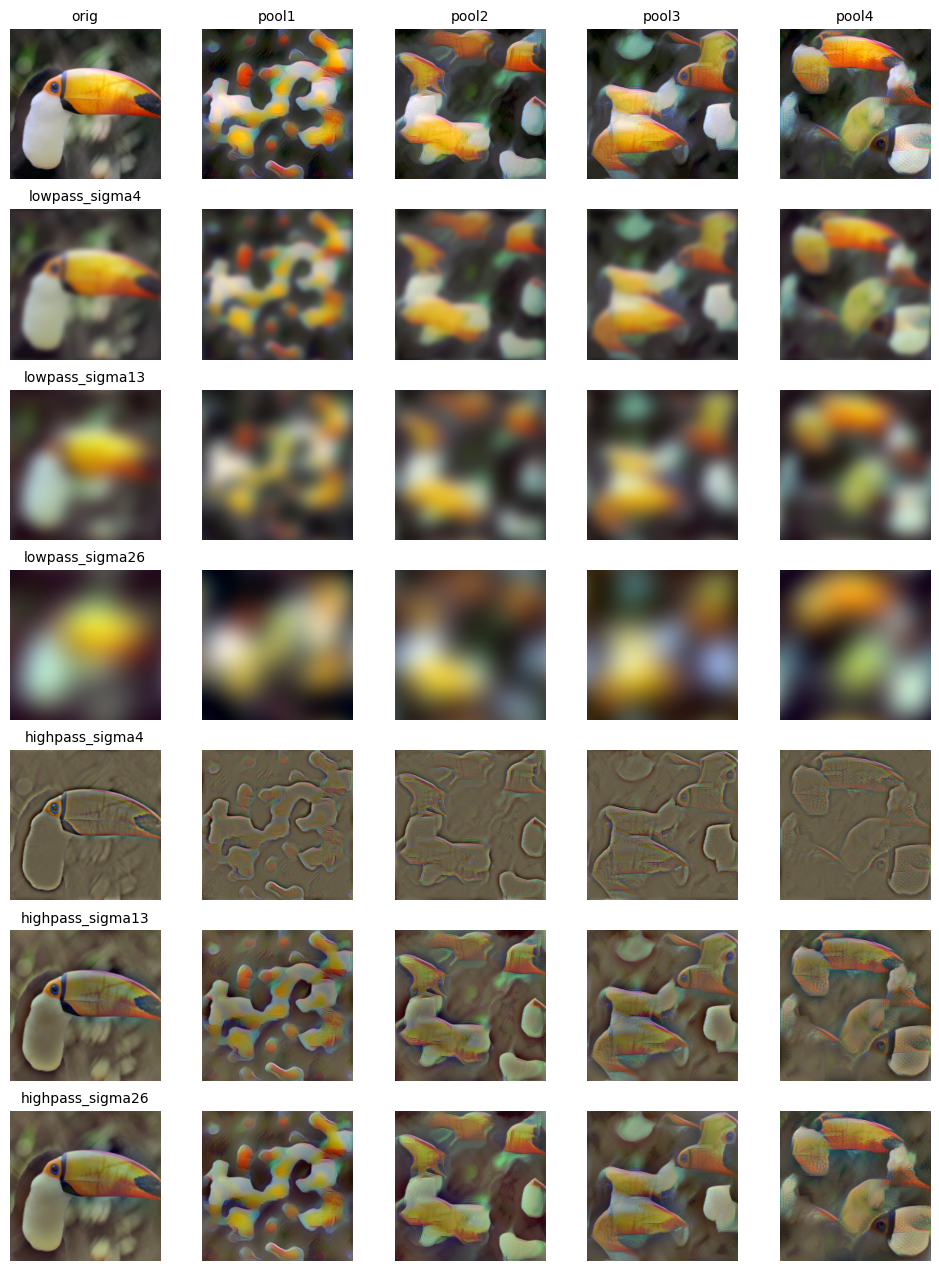

In [55]:
import PIL.Image

name = 'toucan_01b'

orig_stim_path = '/user_data/mmhender/stimuli/featsynth/images_v1'
save_stim_path = '/user_data/mmhender/stimuli/featsynth/images_v1_filtered'


filt_names = ['lowpass_sigma%d'%s for s in sigmas] + ['highpass_sigma%d'%s for s in sigmas]
filt_folders = [os.path.join(save_stim_path, 'filt_%s'%fn, name) for fn in filt_names]
filt_names = ['orig'] + filt_names
filt_folders = [os.path.join(orig_stim_path, name)] + filt_folders

fns = ['orig.png',
 'grid5_1x1_upto_pool1.png',
 'grid5_1x1_upto_pool2.png',
 'grid5_1x1_upto_pool3.png',
 'grid5_1x1_upto_pool4.png']
imtype_names = ['intact','pool1','pool2','pool3','pool4']

plt.figure(figsize=(12,16))
pi=0
for fo, folder in enumerate(filt_folders):

    for fi, fn in enumerate(fns):
        
        pi+=1
        plt.subplot(7,5,pi)

        fullfn = os.path.join(folder, fn)
        image = PIL.Image.open(fullfn)

        plt.imshow(image)
        
        if pi<6:
            plt.title(imtype_names[fi])
       
        if np.mod(pi,5)==1:
            plt.title(filt_names[fo])
            
        plt.axis('off')

In [50]:
pi

0